In [1]:
var openDigger = require('../src/open_digger');
var year = 2022, startYear = 2015;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
var my_repo_id =18275356 ;

# ***facebookarchive/pop项目分析***

##  1 每月新增Star和Fork的个数

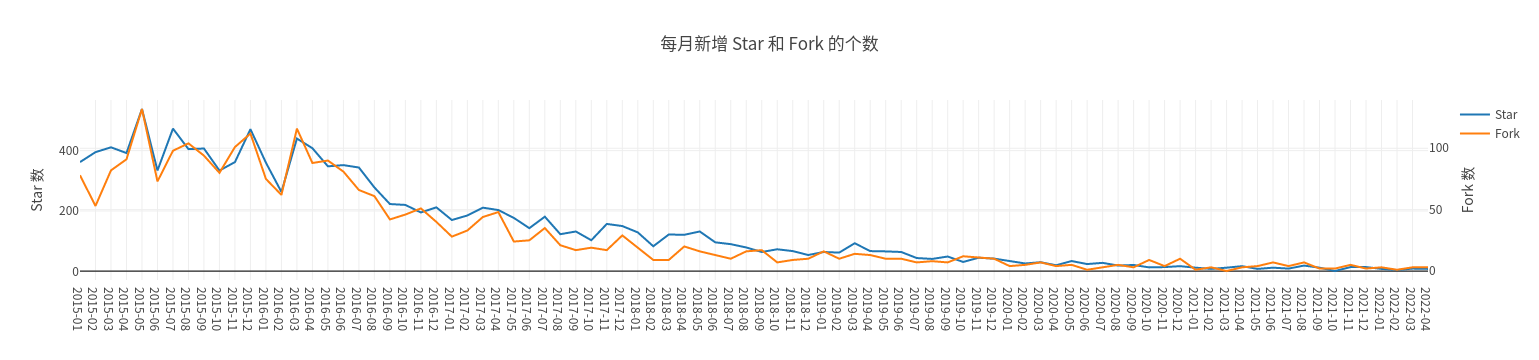

In [2]:
Promise.all(years.map(y => {
    var q = `
    select t1.time as time1, t2.time as time2, stars, forks
    from 
        (select count(*) as stars ,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.year${y} 
        where repo_id=${my_repo_id} and type='WatchEvent'
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t1
    
        FULL OUTER JOIN
    
        (select count(*) as forks ,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.year${y} 
        where repo_id=${my_repo_id} and type='ForkEvent'
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t2
    
        ON t1.time=t2.time
    `
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    var stars = [], forks=[], time = [], tt = [];
    data.forEach(d => {
        d.forEach(dd => {
            stars.push(parseInt(dd.stars));
            forks.push(parseInt(dd.forks));
            if (dd.time1!='') {
                time.push(dd.time1);
                tt.push({'时间':dd.time1, '新增 Star 数':parseInt(dd.stars), '新增 Fork 数':parseInt(dd.forks)});
            }
            else {
                time.push(dd.time2);
                tt.push({'时间':dd.time2, '新增 Star 数':parseInt(dd.stars), '新增 Fork 数':parseInt(dd.forks)});
            }
        });
    });
    openDigger.render.plotly([
        {x: time, y: stars, mode:'line', name:'Star'}, 
        {x: time, y: forks, mode:'line', name:'Fork',yaxis: 'y2'}
    ], {
        title: '每月新增 Star 和 Fork 的个数',
        yaxis: { title: 'Star 数'},
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x', title: 'Fork 数'},
        xaxis: {type: 'category'}
    });
    console.table(tt)
});


## 2 每月打开 Issue 和关闭 Issue 的个数

┌─────────┬───────────┬──────────────┬──────────────┐
│ (index) │   时间    │ 新增 Star 数 │ 新增 Fork 数 │
├─────────┼───────────┼──────────────┼──────────────┤
│    0    │ '2015-01' │     362      │      78      │
│    1    │ '2015-02' │     395      │      53      │
│    2    │ '2015-03' │     411      │      82      │
│    3    │ '2015-04' │     392      │      91      │
│    4    │ '2015-05' │     538      │     132      │
│    5    │ '2015-06' │     334      │      73      │
│    6    │ '2015-07' │     473      │      98      │
│    7    │ '2015-08' │     405      │     104      │
│    8    │ '2015-09' │     407      │      94      │
│    9    │ '2015-10' │     334      │      80      │
│   10    │ '2015-11' │     362      │     101      │
│   11    │ '2015-12' │     471      │     112      │
│   12    │ '2016-01' │     360      │      75      │
│   13    │ '2016-02' │     263      │      62      │
│   14    │ '2016-03' │     440      │     116      │
│   15    │ '2016-04' │     408     

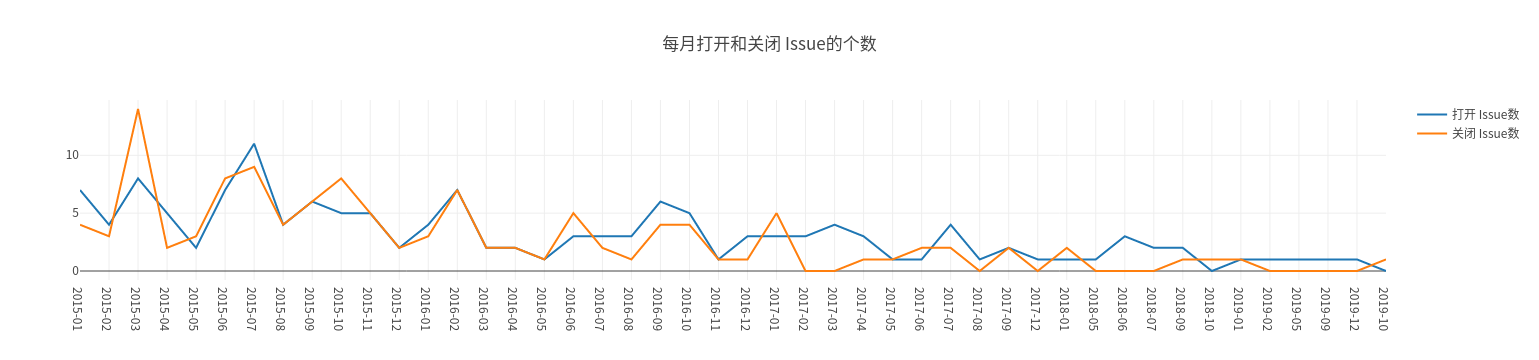

In [3]:
Promise.all(years.map(y => {
    var q = `
    select t1.time as time1, t2.time as time2, open_issues, close_issues
    from 
        (select count(*) as open_issues,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.year${y} 
        where repo_id=${my_repo_id} and type = 'IssuesEvent' and action in('opened','reopened')
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t1
    
        FULL OUTER JOIN
    
        (select count(*) as close_issues,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.year${y} 
        where repo_id=${my_repo_id} and type = 'IssuesEvent' and action='closed'
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t2
    
        ON t1.time=t2.time
    `
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    var open_issues = [], close_issues=[], time = [], tt = [];
    data.forEach(d => {
        d.forEach(dd => {
            open_issues.push(parseInt(dd.open_issues));
            close_issues.push(parseInt(dd.close_issues));
            if (dd.time1!='') {
                time.push(dd.time1);
                tt.push({'时间':dd.time1, '打开 Issue 数':parseInt(dd.open_issues), '关闭 Issue 数':parseInt(dd.close_issues)});
            }
            else {
                time.push(dd.time2);
                tt.push({'时间':dd.time2, '打开 Issue 数':parseInt(dd.open_issues), '关闭 Issue 数':parseInt(dd.close_issues)});
            }
        });
    });
    openDigger.render.plotly([
        {x: time, y: open_issues, mode:'line', name:'打开 Issue数'}, 
        {x: time, y: close_issues, mode:'line', name:'关闭 Issue数'}
    ], {
        title: '每月打开和关闭 Issue的个数',
        xaxis: {type: 'category'}
    });
    console.table(tt)
});

## 3 每月打开 PR 和合入 PR 的个数

┌─────────┬───────────┬───────────────┬───────────────┐
│ (index) │   时间    │ 打开 Issue 数 │ 关闭 Issue 数 │
├─────────┼───────────┼───────────────┼───────────────┤
│    0    │ '2015-01' │       7       │       4       │
│    1    │ '2015-02' │       4       │       3       │
│    2    │ '2015-03' │       8       │      14       │
│    3    │ '2015-04' │       5       │       2       │
│    4    │ '2015-05' │       2       │       3       │
│    5    │ '2015-06' │       7       │       8       │
│    6    │ '2015-07' │      11       │       9       │
│    7    │ '2015-08' │       4       │       4       │
│    8    │ '2015-09' │       6       │       6       │
│    9    │ '2015-10' │       5       │       8       │
│   10    │ '2015-11' │       5       │       5       │
│   11    │ '2015-12' │       2       │       2       │
│   12    │ '2016-01' │       4       │       3       │
│   13    │ '2016-02' │       7       │       7       │
│   14    │ '2016-03' │       2       │       2       │


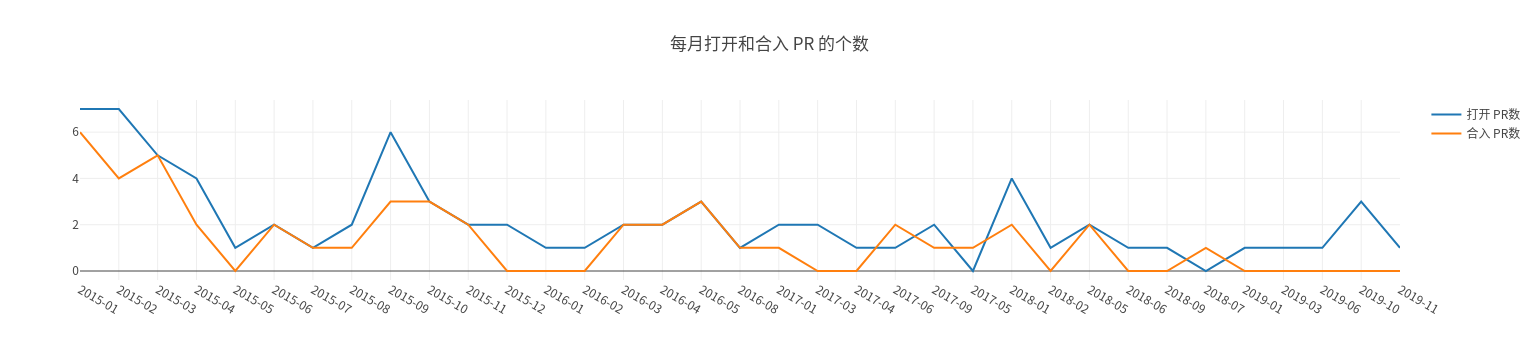

In [4]:
Promise.all(years.map(y => {
    var q = `
    select t1.time as time1, t2.time as time2, open_PR, merge_PR
    from 
        (select count(*) as open_PR,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.year${y} 
        where repo_id=${my_repo_id} and type = 'PullRequestEvent' and action in('opened','reopened')
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t1
    
        FULL OUTER JOIN
    
        (select count(*) as merge_PR,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.year${y} 
        where repo_id=${my_repo_id} and type = 'PullRequestEvent' and action in('closed') and pull_merged=1
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t2
    
        ON t1.time=t2.time
    `
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    // console.log(data)
    var open_PR = [], merge_PR=[], time = [], tt = [];
    data.forEach(d => {
        d.forEach(dd => {
            open_PR.push(parseInt(dd.open_PR));
            merge_PR.push(parseInt(dd.merge_PR));
            if (dd.time1!='') {
                time.push(dd.time1);
                tt.push({'时间':dd.time1, '打开 PR 数':parseInt(dd.open_PR), '合入 PR 数':parseInt(dd.merge_PR)});
            }
            else {
                time.push(dd.time2);
                tt.push({'时间':dd.time2, '打开 PR 数':parseInt(dd.open_PR), '合入 PR 数':parseInt(dd.merge_PR)});
            }
            
        });
    });
    openDigger.render.plotly([
        {x: time, y: open_PR, mode:'line', name:'打开 PR数'}, 
        {x: time, y: merge_PR, mode:'line', name:'合入 PR数'}
    ], {
        title: '每月打开和合入 PR 的个数',
        xaxis: {type: 'category'}
    });
    console.table(tt);
});

## 4 每月在仓库中活跃（只要有日志产生就算）的不同开发者总数

┌─────────┬───────────┬────────────┬────────────┐
│ (index) │   时间    │ 打开 PR 数 │ 合入 PR 数 │
├─────────┼───────────┼────────────┼────────────┤
│    0    │ '2015-01' │     7      │     6      │
│    1    │ '2015-02' │     7      │     4      │
│    2    │ '2015-03' │     5      │     5      │
│    3    │ '2015-04' │     4      │     2      │
│    4    │ '2015-05' │     1      │     0      │
│    5    │ '2015-06' │     2      │     2      │
│    6    │ '2015-07' │     1      │     1      │
│    7    │ '2015-08' │     2      │     1      │
│    8    │ '2015-09' │     6      │     3      │
│    9    │ '2015-10' │     3      │     3      │
│   10    │ '2015-11' │     2      │     2      │
│   11    │ '2015-12' │     2      │     0      │
│   12    │ '2016-01' │     1      │     0      │
│   13    │ '2016-02' │     1      │     0      │
│   14    │ '2016-03' │     2      │     2      │
│   15    │ '2016-04' │     2      │     2      │
│   16    │ '2016-05' │     3      │     3      │
│   17  

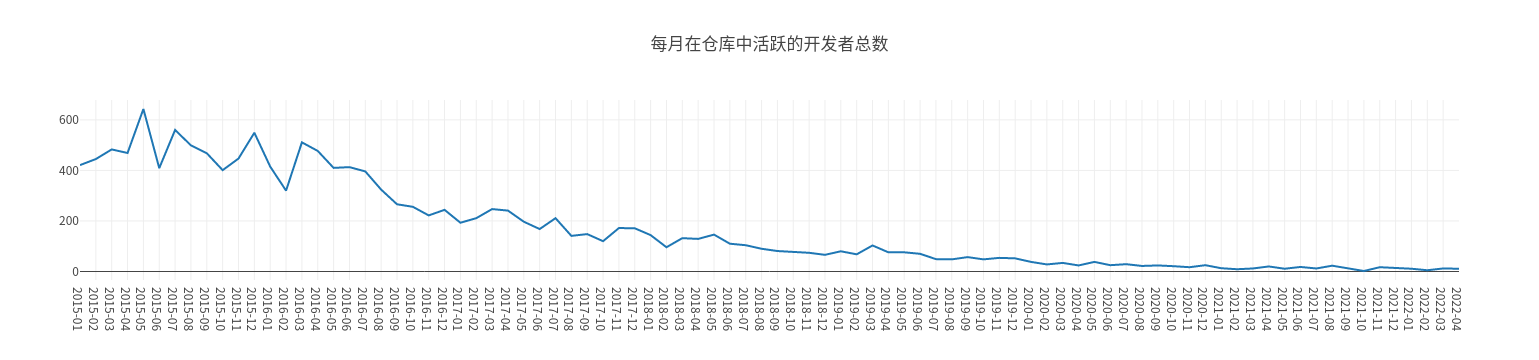

In [6]:
Promise.all(years.map(y => {
    var q = `
    select count(distinct actor_id) as active_user,
    formatDateTime(created_at, '%Y-%m') as time
    from github_log.year${y} 
    where repo_id=${my_repo_id}
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    var active_user = [], time = [], tt = [];
    data.forEach(d => {
        d.forEach(dd => {
            active_user.push(parseInt(dd.active_user));
            time.push(dd.time);
            tt.push({'时间':dd.time,'活跃的开发者总数':parseInt(dd.active_user)});
        });
    });
    openDigger.render.plotly(
        [{x: time, y: active_user, mode:"line"}], {
        title: '每月在仓库中活跃的开发者总数',
        xaxis: {type: 'category'}
    });
    console.table(tt);
});

## 5 Issue 从打开到关闭的平均时长和中位数（单位：天）

In [6]:
var query = openDigger.driver.clickhouse.query;
query(
    ` 
    select avg(dateDiff('day',issue_created_at,issue_closed_at)) as avg,median(dateDiff('day',issue_created_at,issue_closed_at)) as median
    from(
        select issue_created_at,issue_closed_at from github_log.year2015 where repo_id=${my_repo_id} and type='IssuesEvent' and action='closed'
        UNION ALL
        select issue_created_at,issue_closed_at from github_log.year2016 where repo_id=${my_repo_id} and type='IssuesEvent' and action='closed'
        UNION ALL
        select issue_created_at,issue_closed_at from github_log.year2017 where repo_id=${my_repo_id} and type='IssuesEvent' and action='closed'
        UNION ALL
        select issue_created_at,issue_closed_at from github_log.year2018 where repo_id=${my_repo_id} and type='IssuesEvent' and action='closed'
        UNION ALL
        select issue_created_at,issue_closed_at from github_log.year2019 where repo_id=${my_repo_id} and type='IssuesEvent' and action='closed'
        UNION ALL
        select issue_created_at,issue_closed_at from github_log.year2020 where repo_id=${my_repo_id} and type='IssuesEvent' and action='closed'
        UNION ALL
        select issue_created_at,issue_closed_at from github_log.year2021 where repo_id=${my_repo_id} and type='IssuesEvent' and action='closed'
        UNION ALL
        select issue_created_at,issue_closed_at from github_log.year2022 where repo_id=${my_repo_id} and type='IssuesEvent' and action='closed')  
    `
     ).then(res=>{
    console.log('Issue 从打开到关闭的平均时长：',res[0].avg.toFixed(2),'天');
    console.log('Issue 从打开到关闭的时长中位数：',res[0].median,'天');
});

┌─────────┬───────────┬──────────────────┐
│ (index) │   时间    │ 活跃的开发者总数 │
├─────────┼───────────┼──────────────────┤
│    0    │ '2015-01' │       421        │
│    1    │ '2015-02' │       445        │
│    2    │ '2015-03' │       483        │
│    3    │ '2015-04' │       469        │
│    4    │ '2015-05' │       643        │
│    5    │ '2015-06' │       409        │
│    6    │ '2015-07' │       560        │
│    7    │ '2015-08' │       499        │
│    8    │ '2015-09' │       468        │
│    9    │ '2015-10' │       401        │
│   10    │ '2015-11' │       447        │
│   11    │ '2015-12' │       549        │
│   12    │ '2016-01' │       415        │
│   13    │ '2016-02' │       320        │
│   14    │ '2016-03' │       511        │
│   15    │ '2016-04' │       477        │
│   16    │ '2016-05' │       410        │
│   17    │ '2016-06' │       413        │
│   18    │ '2016-07' │       396        │
│   19    │ '2016-08' │       324        │
│   20    │ '2016-09'

## 6 PR 从打开到合入的平均时长和中位数（单位：天）

In [7]:
query(
    ` 
    select avg(dateDiff('day',issue_created_at,pull_merged_at)) as avg,median(dateDiff('day',issue_created_at,pull_merged_at)) as median
    from(
        select issue_created_at,pull_merged_at from github_log.year2015 where repo_id=${my_repo_id} and type='PullRequestEvent' and action='closed' and pull_merged=1
        UNION ALL
        select issue_created_at,pull_merged_at from github_log.year2016 where repo_id=${my_repo_id} and type='PullRequestEvent' and action='closed' and pull_merged=1
        UNION ALL
        select issue_created_at,pull_merged_at from github_log.year2017 where repo_id=${my_repo_id} and type='PullRequestEvent' and action='closed' and pull_merged=1
        UNION ALL
        select issue_created_at,pull_merged_at from github_log.year2018 where repo_id=${my_repo_id} and type='PullRequestEvent' and action='closed' and pull_merged=1
        UNION ALL
        select issue_created_at,pull_merged_at from github_log.year2019 where repo_id=${my_repo_id} and type='PullRequestEvent' and action='closed' and pull_merged=1
        UNION ALL
        select issue_created_at,pull_merged_at from github_log.year2020 where repo_id=${my_repo_id} and type='PullRequestEvent' and action='closed' and pull_merged=1
        UNION ALL
        select issue_created_at,pull_merged_at from github_log.year2021 where repo_id=${my_repo_id} and type='PullRequestEvent' and action='closed' and pull_merged=1
        UNION ALL
        select issue_created_at,pull_merged_at from github_log.year2022 where repo_id=${my_repo_id} and type='PullRequestEvent' and action='closed' and pull_merged=1)
    `
     ).then(res=>{
    console.log('PR 从打开到合入的平均时长：',res[0].avg.toFixed(2),'天');
    console.log('PR 从打开到合入的时长中位数：',res[0].median,'天');
});

PR 从打开到合入的平均时长： 13.87 天
PR 从打开到合入的时长中位数： 0 天


## 7 Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [8]:
query(
    ` 
    select avg(first_comment_time) as avg_first_comment_time, median(first_comment_time) as median_first_comment_time
    from(
        select min(dateDiff('day',issue_created_at,issue_comment_created_at)) as first_comment_time
        from(
            select issue_id,issue_created_at,issue_comment_created_at from github_log.year2015 where repo_id=${my_repo_id} and type='IssueCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,issue_comment_created_at from github_log.year2016 where repo_id=${my_repo_id} and type='IssueCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,issue_comment_created_at from github_log.year2017 where repo_id=${my_repo_id} and type='IssueCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,issue_comment_created_at from github_log.year2018 where repo_id=${my_repo_id} and type='IssueCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,issue_comment_created_at from github_log.year2019 where repo_id=${my_repo_id} and type='IssueCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,issue_comment_created_at from github_log.year2020 where repo_id=${my_repo_id} and type='IssueCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,issue_comment_created_at from github_log.year2021 where repo_id=${my_repo_id} and type='IssueCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,issue_comment_created_at from github_log.year2022 where repo_id=${my_repo_id} and type='IssueCommentEvent' and action='created')
        group by issue_id)
    
    `
     ).then(res=>{
    console.log('Issue 从打开到第一次有人回复的平均时长：',res[0].avg_first_comment_time.toFixed(2),'天');
    console.log('Issue 从打开到第一次有人回复的时长中位数：',res[0].median_first_comment_time,'天');
});

Issue 从打开到第一次有人回复的平均时长： 67.28 天
Issue 从打开到第一次有人回复的时长中位数： 0 天


In [9]:
query(
    ` 
    select avg(first_comment_time) as avg_first_comment_time, median(first_comment_time) as median_first_comment_time
    from(
        select min(dateDiff('day',issue_created_at,pull_review_comment_created_at)) as first_comment_time
        from(
             select issue_id,issue_created_at,pull_review_comment_created_at from github_log.year2015 where repo_id=${my_repo_id} and type='PullRequestReviewCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,pull_review_comment_created_at from github_log.year2016 where repo_id=${my_repo_id} and type='PullRequestReviewCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,pull_review_comment_created_at from github_log.year2017 where repo_id=${my_repo_id} and type='PullRequestReviewCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,pull_review_comment_created_at from github_log.year2018 where repo_id=${my_repo_id} and type='PullRequestReviewCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,pull_review_comment_created_at from github_log.year2019 where repo_id=${my_repo_id} and type='PullRequestReviewCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,pull_review_comment_created_at from github_log.year2020 where repo_id=${my_repo_id} and type='PullRequestReviewCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,pull_review_comment_created_at from github_log.year2021 where repo_id=${my_repo_id} and type='PullRequestReviewCommentEvent' and action='created'
            UNION ALL
            select issue_id,issue_created_at,pull_review_comment_created_at from github_log.year2022 where repo_id=${my_repo_id} and type='PullRequestReviewCommentEvent' and action='created')
        group by issue_id)
    
    `
     ).then(res=>{
    console.log('PR 从打开到第一次有人回复的平均时长：',res[0].avg_first_comment_time.toFixed(2),'天');
    console.log('PR 从打开到第一次有人回复的时长中位数：',res[0].median_first_comment_time,'天');
});

PR 从打开到第一次有人回复的平均时长： 84.29 天
PR 从打开到第一次有人回复的时长中位数： 1 天


## 8 根据你观察到的仓库的历史数据，尝试找到几个你认为关键或值得注意的时间节点

2016年7月之前，项目平均每月能获得400左右的新增star以及100左右的新增fork。

随着paper项目的关停以及主要贡献者Kimon Tsinteris的离职，2016年7月之后，项目新增star数和新增fork数持续走低，但次要贡献者Adam Bell依旧在维护项目。

直到2019年底，每月产生的issue操作和PR操作均彻底归零，推测此时项目进入了Archive状态，终止了维护。